In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_style("whitegrid")

In [4]:
# Read in the data
data = pd.read_csv("online_advertising_performance_data.csv")

In [48]:
data.describe()

,day,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
count,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000,0.0,0.0
mean,15.518886,15512.573014,11.370262,161.788487,17.929943,42.300623,2123.288058,NaN,NaN
std,8.740909,44392.392890,45.369499,728.276911,96.781834,213.685660,10523.029607,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,8.000000,78.000000,0.024000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,15.000000,1182.000000,0.339850,6.000000,0.483950,0.000000,0.000000,NaN,NaN
75%,23.000000,8960.250000,2.536225,53.000000,3.839800,3.000000,163.351200,NaN,NaN
max,31.000000,455986.000000,556.704800,14566.000000,2096.211600,3369.000000,199930.318000,NaN,NaN


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

In [5]:
# Remove redundant columns
data = data.drop(["Unnamed: 12", "Unnamed: 13"], axis=1)

In [6]:
print(f"""Dataset Shape: {data.shape}.
it consists of {data.shape[0]} Datapoints and {data.shape[1]} Columns.""")

Dataset Shape: (15408, 12).
it consists of 15408 Datapoints and 12 Columns.


In [19]:
data.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000


In [34]:
data["cost"].sum()

175190.2145

In [35]:
data["revenue"].sum()

276264.26670000004

In [20]:
# Missing values:
print(data.isnull().sum())

month                        0
day                          0
campaign_number              0
user_engagement              0
banner                       0
placement                  413
displays                     0
cost                         0
clicks                       0
revenue                      0
post_click_conversions       0
post_click_sales_amount      0
dtype: int64


In [7]:
data = data.dropna()
print(data.isnull().sum())
print(f"""Der Datensatz hat die Form {data.shape}.
Er besteht aus {data.shape[0]} Datenpunkte und {data.shape[1]} Spalten.""")

month                      0
day                        0
campaign_number            0
user_engagement            0
banner                     0
placement                  0
displays                   0
cost                       0
clicks                     0
revenue                    0
post_click_conversions     0
post_click_sales_amount    0
dtype: int64
Der Datensatz hat die Form (14995, 12).
Er besteht aus 14995 Datenpunkte und 12 Spalten.


In [8]:
# Rename columns
data.rename(columns={"cost": "placement_costs_by_advert_firm", "revenue": "ad_spend_by_company_x"}, inplace=True)

data.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,placement_costs_by_advert_firm,clicks,ad_spend_by_company_x,post_click_conversions,post_click_sales_amount
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000


In [58]:
# Missing values:
print(data.isnull().sum())

month                               0
day                                 0
campaign_number                     0
user_engagement                     0
banner                              0
placement                         413
displays                            0
placement_costs_by_advert_firm      0
clicks                              0
ad_spend_by_company_x               0
post_click_conversions              0
post_click_sales_amount             0
dtype: int64


In [9]:
data = data.dropna()
print(data.isnull().sum())
print(f"""Der Datensatz hat die Form {data.shape}.
Er besteht aus {data.shape[0]} Datenpunkte und {data.shape[1]} Spalten.""")
data.head()

month                             0
day                               0
campaign_number                   0
user_engagement                   0
banner                            0
placement                         0
displays                          0
placement_costs_by_advert_firm    0
clicks                            0
ad_spend_by_company_x             0
post_click_conversions            0
post_click_sales_amount           0
dtype: int64
Der Datensatz hat die Form (14995, 12).
Er besteht aus 14995 Datenpunkte und 12 Spalten.


,month,day,campaign_number,user_engagement,banner,placement,displays,placement_costs_by_advert_firm,clicks,ad_spend_by_company_x,post_click_conversions,post_click_sales_amount
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000


<Axes: xlabel='banner', ylabel='clicks'>

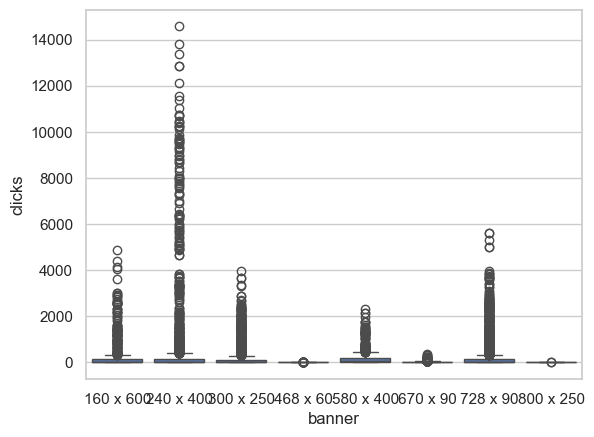

In [10]:
mask = data["clicks"] > 0 
sns.boxplot(x="banner", y = 'clicks', data=data[mask])

<Axes: xlabel='clicks', ylabel='post_click_sales_amount'>

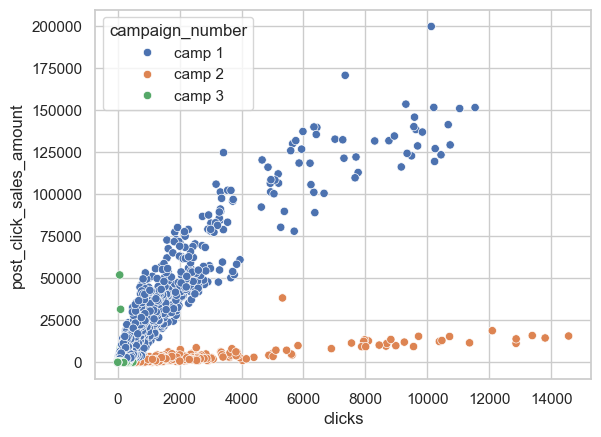

In [61]:
# Corellation of clicks and sales amount
sns.scatterplot(x="clicks", y = 'post_click_sales_amount', data=data, hue="campaign_number")
#sns.scatterplot(x="clicks", y = 'post_click_sales_amount', data=data[data["campaign_number"] == "camp 3"], hue="campaign_number")

<Axes: xlabel='clicks', ylabel='post_click_sales_amount'>

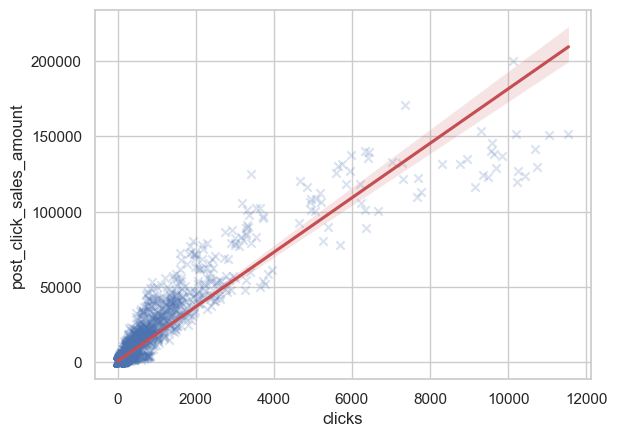

In [62]:
sns.regplot(x="clicks", y = 'post_click_sales_amount', data=data[data["campaign_number"] == "camp 1"], 
            scatter_kws={'alpha':0.2}, line_kws=dict(color="r"), marker="x")

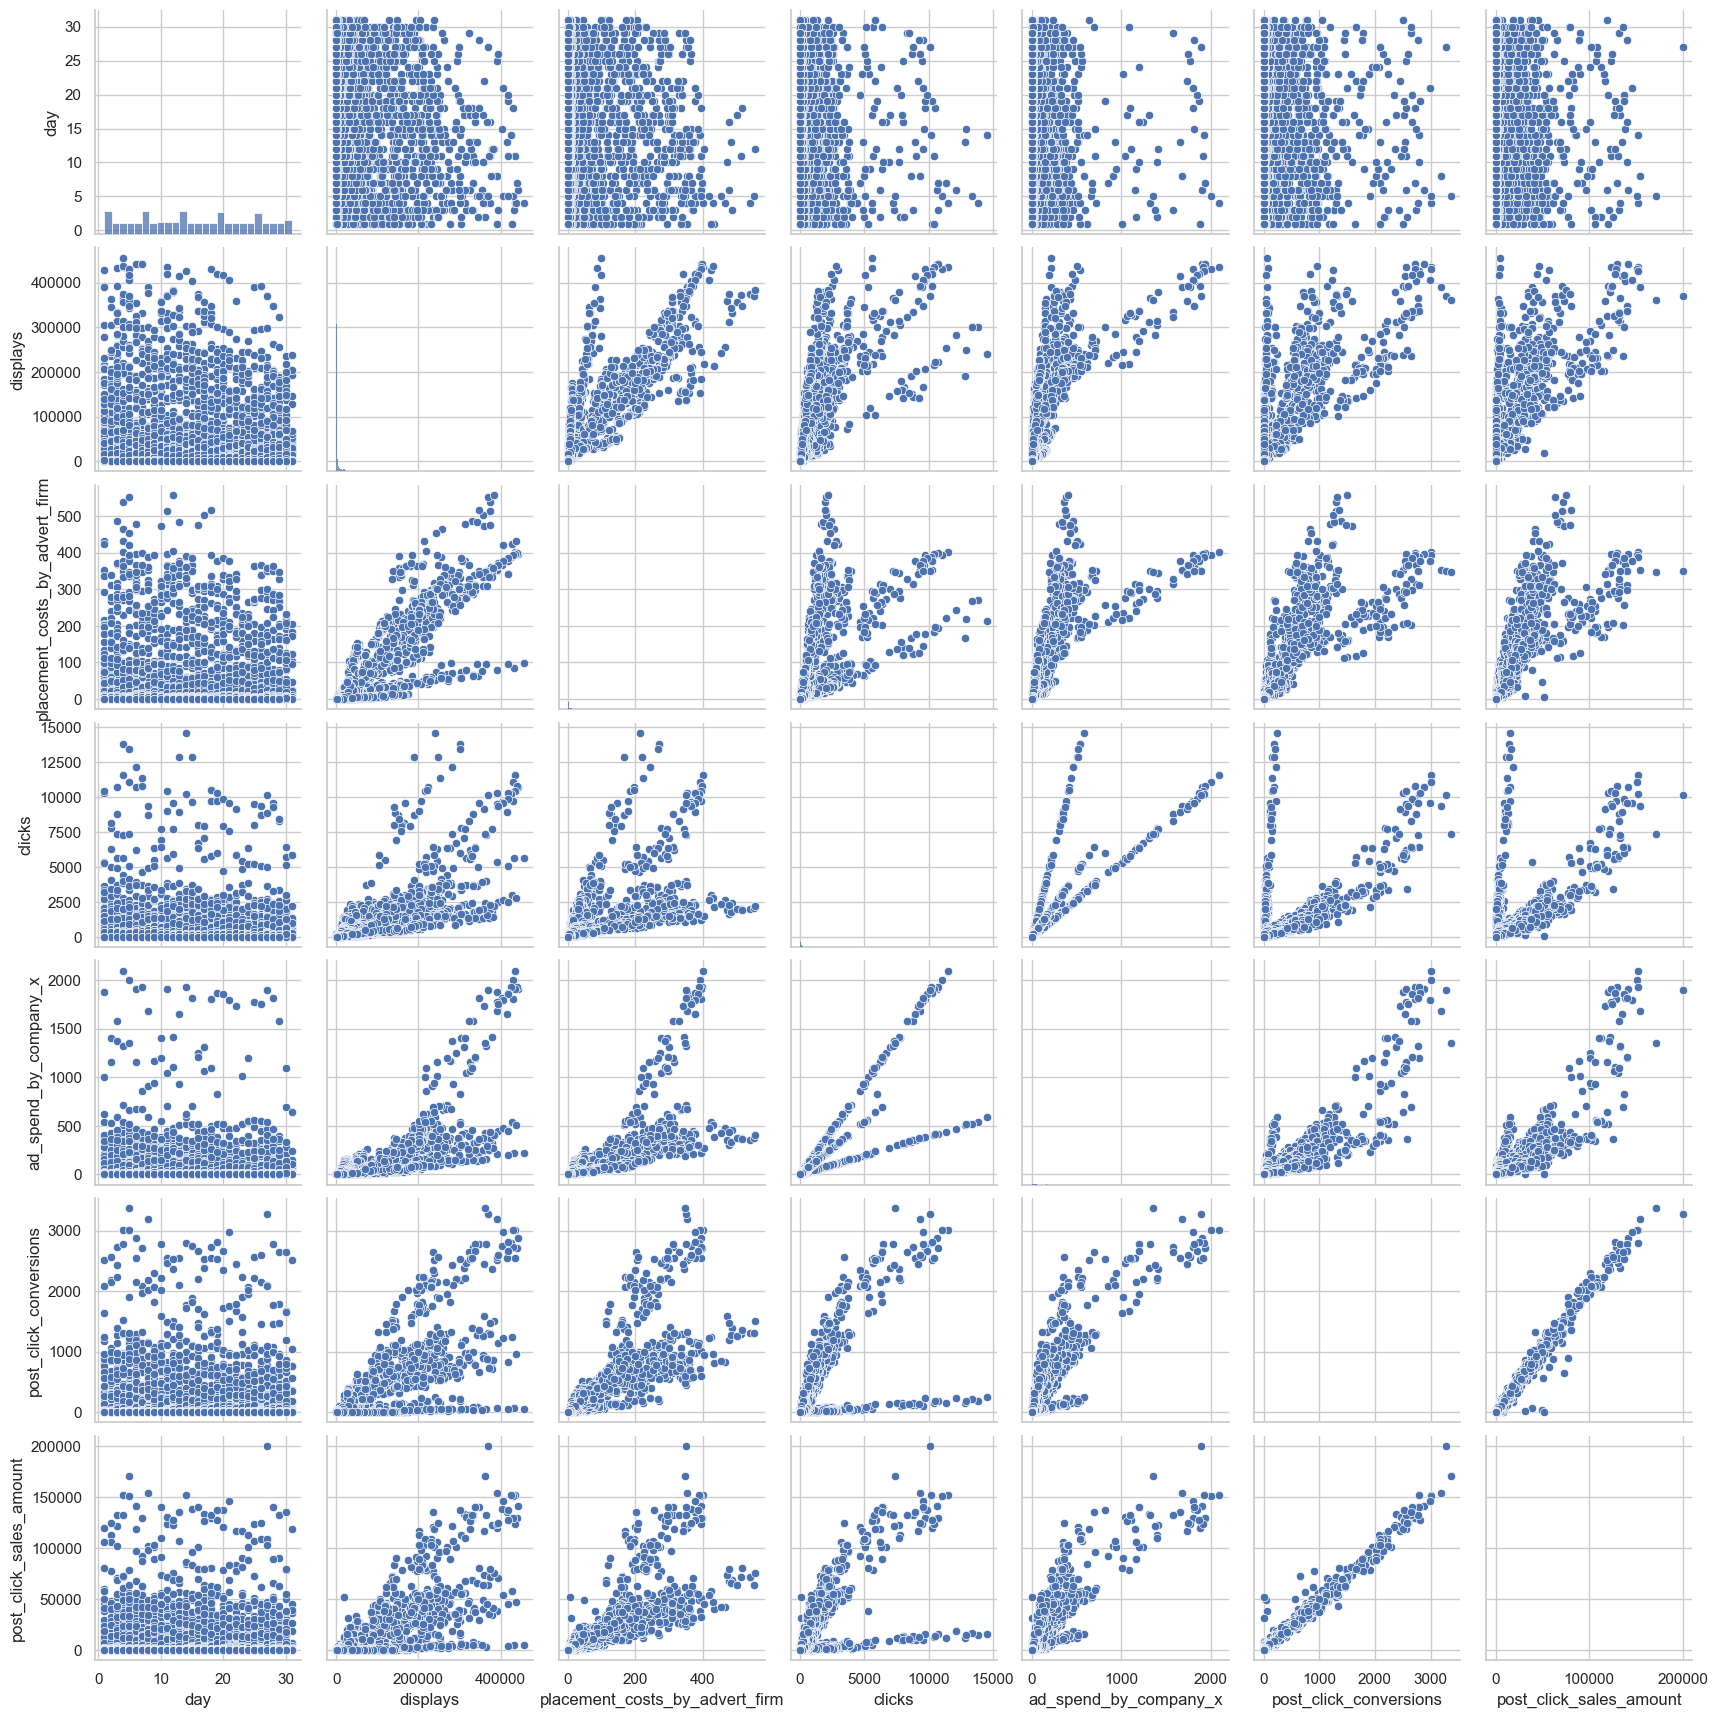

In [28]:
sns.pairplot(data)

In [63]:
# save for editing by tableau
data.to_csv("oapd_tableau.csv")

In [64]:
data.corr(numeric_only=True)

,day,displays,placement_costs_by_advert_firm,clicks,ad_spend_by_company_x,post_click_conversions,post_click_sales_amount
day,1.000000,-0.057198,-0.036641,-0.028267,-0.027595,-0.011991,-0.011080
displays,-0.057198,1.000000,0.881986,0.766641,0.754389,0.779958,0.787834
placement_costs_by_advert_firm,-0.036641,0.881986,1.000000,0.672477,0.760258,0.841466,0.841870
clicks,-0.028267,0.766641,0.672477,1.000000,0.843448,0.701952,0.718558
ad_spend_by_company_x,-0.027595,0.754389,0.760258,0.843448,1.000000,0.880286,0.887026
post_click_conversions,-0.011991,0.779958,0.841466,0.701952,0.880286,1.000000,0.992145
post_click_sales_amount,-0.011080,0.787834,0.841870,0.718558,0.887026,0.992145,1.000000


In [65]:
data.head()


,month,day,campaign_number,user_engagement,banner,placement,displays,placement_costs_by_advert_firm,clicks,ad_spend_by_company_x,post_click_conversions,post_click_sales_amount
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000


In [11]:
# Further preprocessing of the data for ML

# Selection of columns relevant for ML:
mldata_2 = data[["campaign_number", "user_engagement", "banner", "placement", "displays", "clicks", "ad_spend_by_company_x", "post_click_conversions", "post_click_sales_amount"]]


# save for editing in another notebook
mldata_2.to_csv("mldata.csv")

mldata_2.head()

,campaign_number,user_engagement,banner,placement,displays,clicks,ad_spend_by_company_x,post_click_conversions,post_click_sales_amount
0,camp 1,High,160 x 600,abc,4,0,0.0000,0,0.0000
1,camp 1,High,160 x 600,def,20170,158,28.9717,23,1972.4602
2,camp 1,High,160 x 600,ghi,14701,158,28.9771,78,2497.2636
3,camp 1,High,160 x 600,mno,171259,1796,329.4518,617,24625.3234
4,camp 1,Low,160 x 600,def,552,1,0.1834,0,0.0000


In [12]:
# Dummy creation
mldata_2 = pd.get_dummies(data=mldata_2, columns=["banner"], prefix="banner", dtype=float, drop_first=True,)
mldata_2 = pd.get_dummies(data=mldata_2, drop_first=True, columns=["placement"], prefix="placement", dtype=float)

mldata_2.head()

,campaign_number,user_engagement,displays,clicks,ad_spend_by_company_x,post_click_conversions,post_click_sales_amount,banner_240 x 400,banner_300 x 250,banner_468 x 60,banner_580 x 400,banner_670 x 90,banner_728 x 90,banner_800 x 250,placement_def,placement_ghi,placement_jkl,placement_mno
0,camp 1,High,4,0,0.0000,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,camp 1,High,20170,158,28.9717,23,1972.4602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,camp 1,High,14701,158,28.9771,78,2497.2636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,camp 1,High,171259,1796,329.4518,617,24625.3234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,camp 1,Low,552,1,0.1834,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<Axes: >

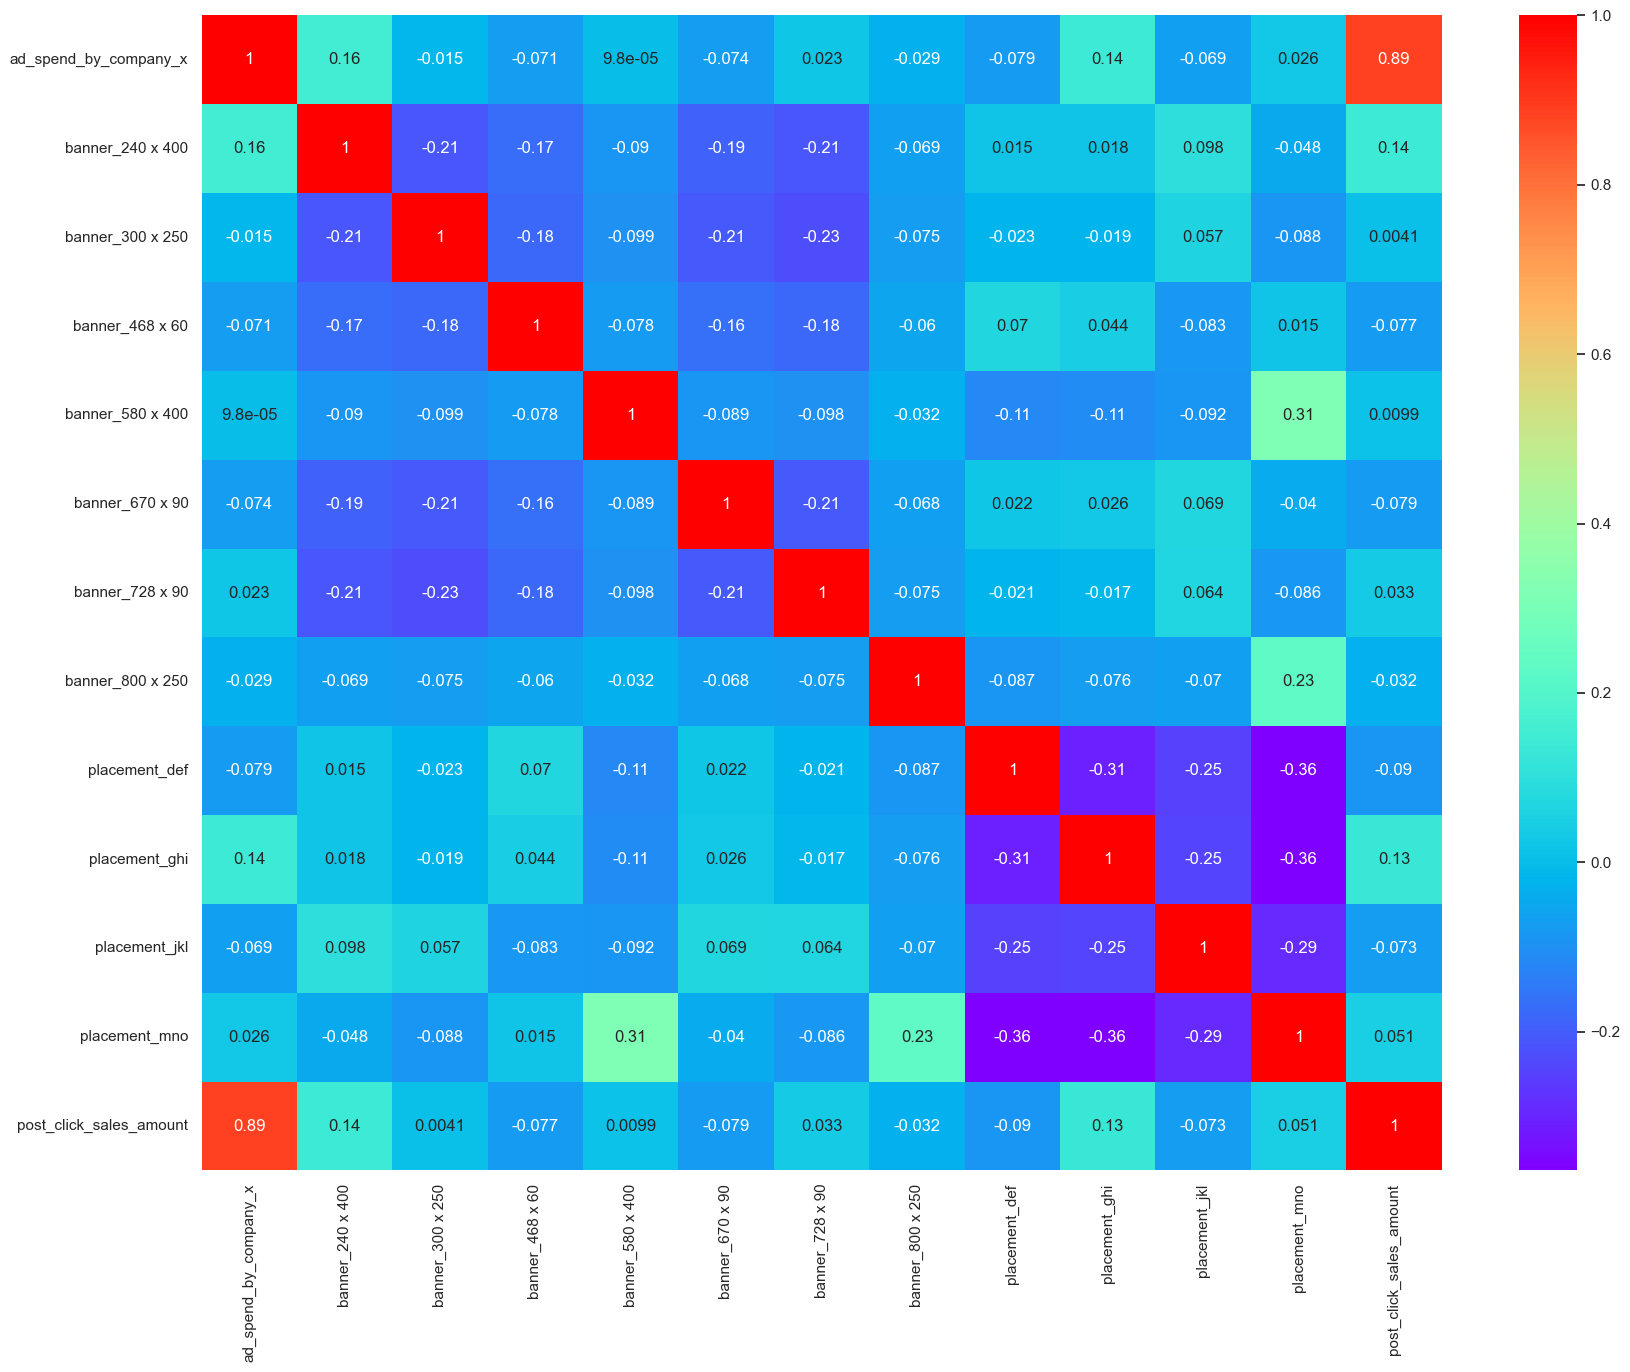

In [16]:
plt.figure(figsize = (20,15))
sns.heatmap(mldata_2[["ad_spend_by_company_x", "banner_240 x 400", "banner_300 x 250", "banner_468 x 60", "banner_580 x 400", "banner_670 x 90", "banner_728 x 90", "banner_800 x 250", "placement_def", "placement_ghi", "placement_jkl", "placement_mno", "post_click_sales_amount"]].corr(), annot = True, cmap = 'rainbow')